# Bivariate analysis

In univariate analysis we only looked at 1 variable (= 1 column) at a time. In bivariate analysis we will now look at the relation between two variables (= 2 columns).

The type of analysis we can do will once again depend on the types of data of these 2 variables. We look look at:
- Numerical VS Numerical.
- Nummerical VS Categorical
- Categorical VS Categorical

## Numerical VS Numerical

Examples:
- Body length VS Shoe size
- Age VS Seconds it takes to run 1 kilometre
- Country Unemployment rate VS Country Happiness Rating
- Customer Revenue VS Customer Lifetime
- Game Wishlists VS Game Purchases
- Student grades VS Student attendance
- ...

In [478]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [479]:
iris = sns.load_dataset("iris")

In [480]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![](https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png "Iris dataset") 

Let's look at the relation between the sepal length and petal length. (Dutch: Kelkblad en bloemblad)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

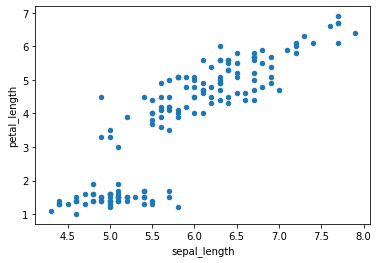

In [481]:
iris.plot(kind='scatter', x='sepal_length', y='petal_length')

A useful statistic for calculating the linear relation between two variable is the **Pearson correlation**.  
The Pearson correlation measures the linear relation between two numerical variables. The result is a number between -1 and 1 where
- -1 indicates a perfect negative linear relation
- 0 indicates that there is no linear relation
- 1 indicates a perfect positive linear relation

![](https://www.spss-tutorials.com/img/correlation-coefficient-multiple-scatterplots.png "Pearson correlation examples")

![](https://cdn1.byjus.com/wp-content/uploads/2019/06/word-image28.png "Pearson correlation formula")

In [482]:
iris[['sepal_length','petal_length']].corr()

,sepal_length,petal_length
sepal_length,1.000000,0.871754
petal_length,0.871754,1.000000


In [483]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [484]:
irisCorrelations = iris.corr()
irisCorrelations.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\dekei\AppData\Local\Temp\ipykernel_10792\3370124769.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  irisCorrelations.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


<AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>

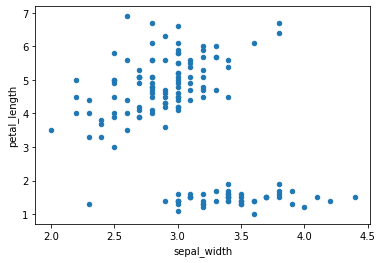

In [485]:
iris.plot(kind='scatter', x='sepal_width', y='petal_length')

In [486]:
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

In [487]:
exampleData = pd.Series(range(100)) + 1
exampleDataNegative = -exampleData
exampleDataDouble = exampleData * 2
exampleDataSquared = exampleData ** 2
exampleDataRoot = exampleData ** 0.5

exampleDataExponential = 2 ** exampleData
exampleDataLog = np.log2(exampleData)

exampleDataWithSmallNoise = exampleData + np.random.randint(low=0, high=10, size=len(exampleData))
exampleDataWithMediumNoise = exampleData + np.random.randint(low=0, high=100, size=len(exampleData))
exampleDataWithHeavyNoise = exampleData + np.random.randint(low=0, high=1000, size=len(exampleData))

exampleDataFrame = pd.DataFrame({'original':exampleData, 'negative':exampleDataNegative, 'double':exampleDataDouble, 'squared':exampleDataSquared, 'root': exampleDataRoot, 'exp':exampleDataExponential, 'log':exampleDataLog, 'noiseSmall': exampleDataWithSmallNoise, 'noiseMedium': exampleDataWithMediumNoise, 'noiseHeavy':exampleDataWithHeavyNoise })

In [488]:
exampleDataFrame.head()

,original,negative,double,squared,root,exp,log,noiseSmall,noiseMedium,noiseHeavy
0,1,-1,2,1,1.000000,2,0.000000,10,73,862
1,2,-2,4,4,1.414214,4,1.000000,7,77,592
2,3,-3,6,9,1.732051,8,1.584963,10,62,566
3,4,-4,8,16,2.000000,16,2.000000,13,54,920
4,5,-5,10,25,2.236068,32,2.321928,10,78,323


In [489]:
exampleDataCorrelations = exampleDataFrame.corr()
exampleDataCorrelations.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\dekei\AppData\Local\Temp\ipykernel_10792\2884428394.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  exampleDataCorrelations.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,original,negative,double,squared,root,exp,log,noiseSmall,noiseMedium,noiseHeavy
original,1.00,-1.00,1.00,0.97,0.98,-0.01,0.90,1.00,0.74,-0.02
negative,-1.00,1.00,-1.00,-0.97,-0.98,0.01,-0.90,-1.00,-0.74,0.02
double,1.00,-1.00,1.00,0.97,0.98,-0.01,0.90,1.00,0.74,-0.02
squared,0.97,-0.97,0.97,1.00,0.91,-0.01,0.78,0.97,0.73,0.01
root,0.98,-0.98,0.98,0.91,1.00,-0.00,0.96,0.97,0.70,-0.04
exp,-0.01,0.01,-0.01,-0.01,-0.00,1.00,-0.00,-0.00,-0.07,0.03
log,0.90,-0.90,0.90,0.78,0.96,-0.00,1.00,0.88,0.61,-0.07
noiseSmall,1.00,-1.00,1.00,0.97,0.97,-0.00,0.88,1.00,0.73,-0.03
noiseMedium,0.74,-0.74,0.74,0.73,0.70,-0.07,0.61,0.73,1.00,0.03
noiseHeavy,-0.02,0.02,-0.02,0.01,-0.04,0.03,-0.07,-0.03,0.03,1.00


<AxesSubplot:>

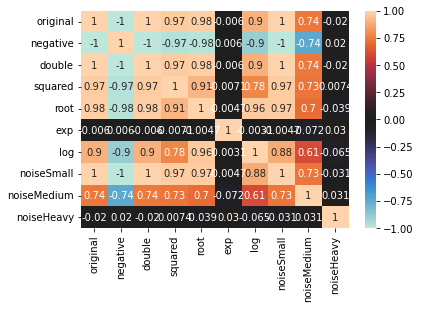

In [490]:
sns.heatmap(exampleDataFrame.corr(), annot = True, vmin=-1, vmax=1, center= 0)

<AxesSubplot:>

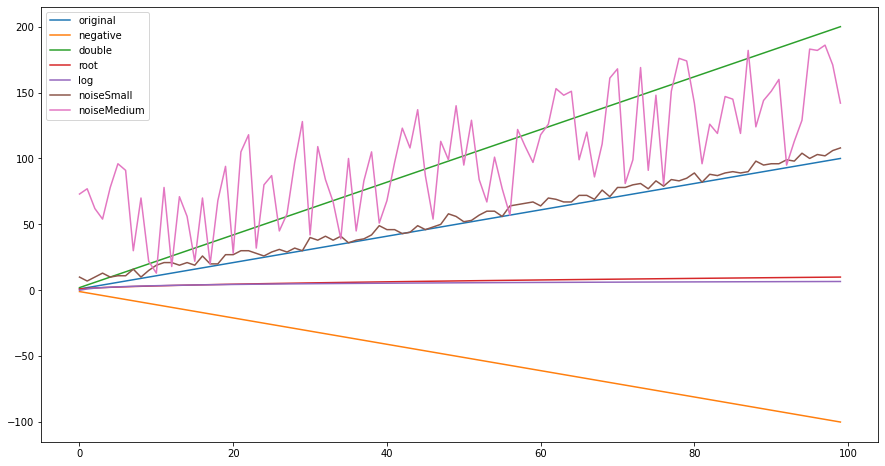

In [491]:
# Excluding a couple of columns because their values are too high to show in the same plot
exampleDataFrame.drop(['exp', 'squared' , 'noiseHeavy'], axis=1).plot(figsize=(15,8))

### Portfolio assignment 9
25 min: Perform a bivariate analysis on the columns with numerical data in the penguins dataset.
- Use corr() on the DataFrame to calculate all the correlations. Use the code example above to show the correlation table with colors.
- Look at the corrrelations. Do they match your expectations?
- Show a scatter plot for
 - The strongest positive correlation
 - The strongest negative correlation
 - The weakest correlation

In [492]:
penguins = sns.load_dataset("penguins")

In [493]:
exampleDataCorrelations = penguins.corr()
exampleDataCorrelations.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\dekei\AppData\Local\Temp\ipykernel_10792\3557949741.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  exampleDataCorrelations.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.24,0.66,0.60
bill_depth_mm,-0.24,1.00,-0.58,-0.47
flipper_length_mm,0.66,-0.58,1.00,0.87
body_mass_g,0.60,-0.47,0.87,1.00


Strongest positive correlation

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

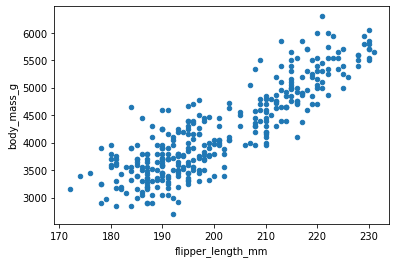

In [494]:
penguins.plot(kind='scatter', x='flipper_length_mm', y='body_mass_g')

Strongest negative correlation

<AxesSubplot:xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

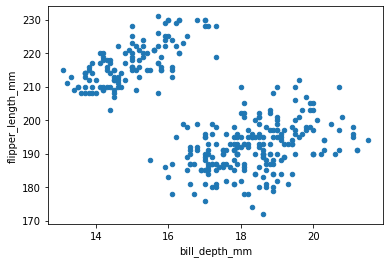

In [495]:
penguins.plot(kind='scatter', x='bill_depth_mm', y='flipper_length_mm')	

The weakest correlation

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

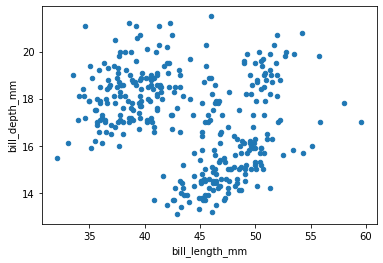

In [496]:
penguins.plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm')	

![](https://www.galapagos.org/wp-content/uploads/2019/04/PenguinMeasurements_BLOGv3.png)

![](https://i.imgur.com/0v1CGNV.png)

### Portfolio assignment 10
15 min: Perform a bivariate analysis (Pearson correlation and scatter plot) on at least 1 combination of 2 columns with numeric data in the dataset that you chose in portfolio assignment 4. Does the correlation and scatter plot match your expectations? Add your answer to your notebook. Commit the Notebook to your portfolio when you're finished. 

In [497]:
pokemons = pd.read_csv('Pokemon.csv')
exampleDataCorrelations = pokemons.drop(['Total', 'Generation' , 'Legendary'], axis=1).corr()
exampleDataCorrelations.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\dekei\AppData\Local\Temp\ipykernel_10792\750357413.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  exampleDataCorrelations.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,1.00,0.10,0.10,0.09,0.09,0.09,0.01
HP,0.10,1.00,0.42,0.24,0.36,0.38,0.18
Attack,0.10,0.42,1.00,0.44,0.40,0.26,0.38
Defense,0.09,0.24,0.44,1.00,0.22,0.51,0.02
Sp. Atk,0.09,0.36,0.40,0.22,1.00,0.51,0.47
Sp. Def,0.09,0.38,0.26,0.51,0.51,1.00,0.26
Speed,0.01,0.18,0.38,0.02,0.47,0.26,1.00


<AxesSubplot:xlabel='Defense', ylabel='Sp. Def'>

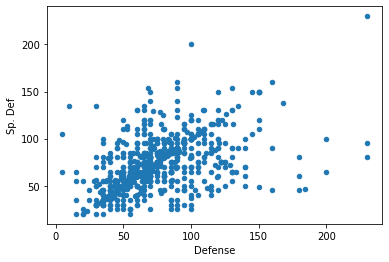

In [498]:
pokemons.plot(kind='scatter', x='Defense', y='Sp. Def')	

It's not a super strong correlation, but we can see that some pokemons specialize in certain stats, per instance, pokemons can be stronger in their defense stats, what means the Attack and Sp. Attack stats of the pokemon won't be that high.
It is what I expected. I have a bit of backgroudn knowledge of Pokemon, and what is seen in the scatter plot matches with the concept that I had in mind

![](https://i.imgur.com/0v1CGNV.png)

## Numerical VS Categorical

Examples:
- Monthly earnings VS Highest obtained degree
- Body length VS Country of origin
- Happiness rating VS Country of origin
- Sales VS Account Manager. 
- Revenue VS Product Category
- Revenue VS Game genre
- Retention VS Software version
- ...

In univariate analysis for numerical data we've looked at confidence intervals. We can use these to check if there are any signicant differences between categories.

You and I are are going to roll a 6-sided die. The numerical variable is the value we roll and the categorical variable is who rolled it. We know that in reality the average value of a 6-sided die is 3.5 (=(1+2+3+4+5+6)/6). We know that there is no skill involved, so who rolls the die should have no impact on the result. We each roll the die 3 times.
    <img src="https://wherethewindsblow.com/wp-content/uploads/2015/07/JUMBO-Six-sided-white-dice.jpg" style="width: 300px;"/>

In [499]:
diceRolls = pd.DataFrame(data= {'Person': ['you', 'you', 'you', 'me','me','me'], 'Rolls': [6,3,6,2,4,2]})
diceRolls

,Person,Rolls
0,you,6
1,you,3
2,you,6
3,me,2
4,me,4
5,me,2


In [500]:
diceRolls.groupby(by="Person").mean()

,Rolls
Person,
me,2.666667
you,5.000000


Looks like you rolled an average value of 5 and I rolled an average value of ~2.7. Does this mean you are better at rolling dice than me?

<AxesSubplot:xlabel='Person', ylabel='Rolls'>

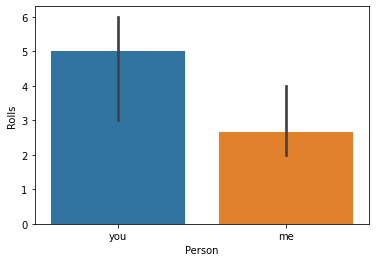

In [501]:
sns.barplot(x="Person", y="Rolls", data=diceRolls)

The confidence intervals overlap. This means that we can not yet be sure that you're a better dice roller than me. If we want the confidence intervals to become smaller, we'll need more data which means we need to do more dice rolls.

Let's look if there are significant difference between iris species.

In [502]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [503]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [504]:
numericalColumnToCheck = "sepal"

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

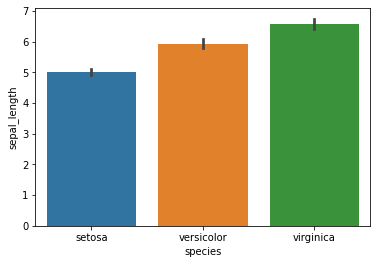

In [505]:
sns.barplot(y="sepal_length", x="species", data=iris) 
# Add parameter ci if you want to change certainty of confidence interval. 
# For example ci = 99 for 99% certainty.
# The default is 95%

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

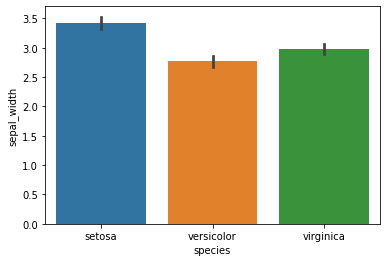

In [506]:
sns.barplot(y="sepal_width", x="species", data=iris)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

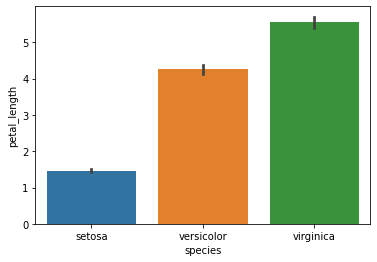

In [507]:
sns.barplot(y="petal_length", x="species", data=iris)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

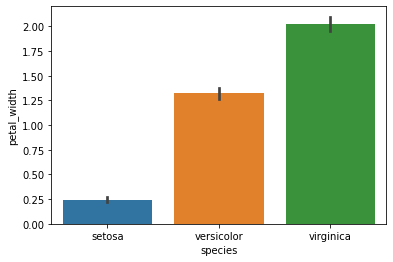

In [508]:
sns.barplot(y="petal_width", x="species", data=iris)

### Portfolio assignment 11
20 min: Do a Numerical VS Categorical bivariate analysis on the penguins dataset.
- Choose one of the categorical columns: species, island or sex
- use .groupby('<columnname>').mean() too look at the means of the numerical columns. Does it look like there is a difference between categories?
- Use the seaborn barplot to plot the mean and confidence. Create this plot for each of the numerical columns (bill_length_mm	bill_depth_mm, flipper_length_mm, body_mass_g)
- For each of the plots, write a conclusion: Is there a statistically significant difference for this numerical column for each category?
- Optional: Repeat this proces for the other two categorical columns

![](https://i.imgur.com/0v1CGNV.png)

![](https://www.galapagos.org/wp-content/uploads/2019/04/PenguinMeasurements_BLOGv3.png)

In [509]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,45.257485,15.874850,209.706587,4716.017964
Dream,44.167742,18.344355,193.072581,3712.903226
Torgersen,38.950980,18.429412,191.196078,3706.372549


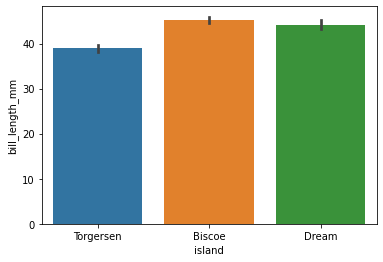

In [510]:
sns.barplot(y="bill_length_mm", x="island", data=penguins)
penguins.groupby(by="island").mean()

There is a significant difference between the Torgersen island and the other two, you can make the affirmation that Pinguins who have a Bil length of less than 4 lives on the Torgersen island. It might have something to do with the species that live there and their caracteristics.

<AxesSubplot:xlabel='island', ylabel='bill_depth_mm'>

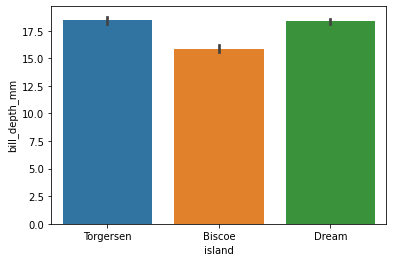

In [511]:
sns.barplot(y="bill_depth_mm", x="island", data=penguins)

There can be noticed that pinguins that have a Bil depth less than 16 live in majority on the Biscoe Island, it can have something to do with the specific species that live on the island. The rest of the pinguins are divided on the other two islands.

<AxesSubplot:xlabel='island', ylabel='flipper_length_mm'>

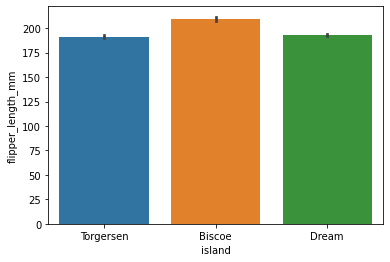

In [512]:
sns.barplot(y="flipper_length_mm", x="island", data=penguins)

The Biscoe Island seems to have more pinguins with a biggfer Flipper length, again it might have something to do with the species.

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

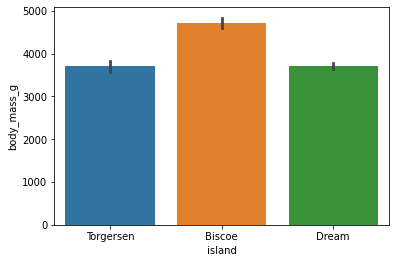

In [513]:

sns.barplot(y="body_mass_g", x="island", data=penguins)

The body mass of the pinguins are higher at the Biscoe Islad, and the other two seem to have a similar distribuition.

### Portfolio assignment 12
30 min: Perform a bivariate analysis on at least 3 combinations of a numerical column with a categorical column in the dataset that you chose in portfolio assignment 4. Use <em>.groupby('columnname').mean()</em> to calculate the means. Is there a difference between categories? Then use seaborn barplots to check if there is a statistically significant difference. 

![](https://i.imgur.com/0v1CGNV.png)

In [514]:
pokemons = pd.read_csv('Pokemon.csv')
pokemons.drop(['#','Total', 'Legendary' , 'Generation'], axis=1).groupby('Type 1').mean()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000
Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235
Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750


There is definetly a difference between the types of pokemon, but here is no way to determine if there's a reason for it or totally random.

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

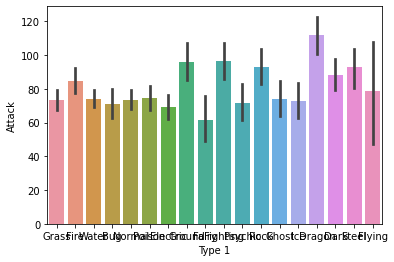

In [515]:
sns.barplot(y="Attack", x="Type 1", data=pokemons)

Dragon seems to be the type that had the highest Attack Stats, the Fighting, Ground and Steel followed after that.

<AxesSubplot:xlabel='Type 1', ylabel='HP'>

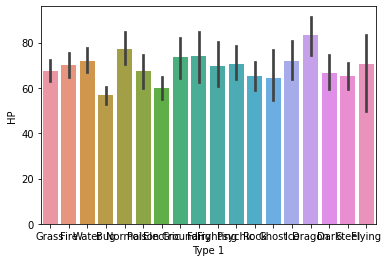

In [516]:
sns.barplot(y="HP", x="Type 1", data=pokemons)

The HP on all Types seems to be more balanced than other stats in the dataset.

<AxesSubplot:xlabel='Type 1', ylabel='Speed'>

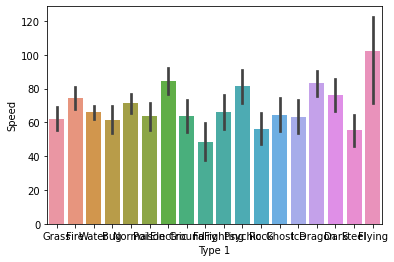

In [517]:
sns.barplot(y="Speed", x="Type 1", data=pokemons)

The flying type has the highest speed stats, but there are other types that can reach the same amount.

## Categorical VS Categorical

Examples:
- Inbound channel VS Type of customer
- Education VS Job function
- Region of citizen VS Who the citizen votes for
- Color shirt of crew member in Stat Trek VS Does the crew member survive? (https://statisticsbyjim.com/hypothesis-testing/chi-square-test-independence-example/)
- Customer newsletter subscription (Yes/No) VS Custom churn (Yes/No)
- Penguin island VS Penguin species
- ...

In [518]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:>

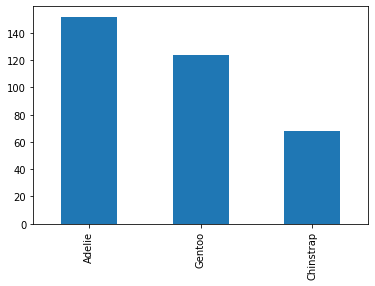

In [519]:
penguins.species.value_counts().plot(kind='bar')

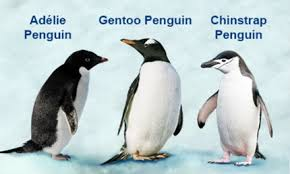

<AxesSubplot:>

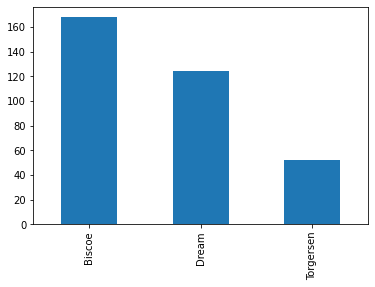

In [520]:
penguins.island.value_counts().plot(kind='bar')

In [521]:
contingencyTable = penguins.groupby(['species','island']).size().unstack('species', fill_value=0)
contingencyTable

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


<AxesSubplot:xlabel='island'>

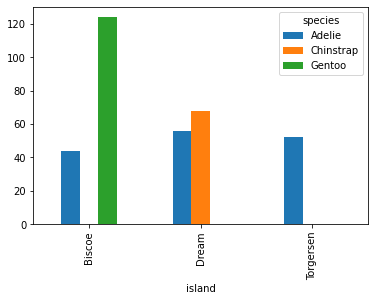

In [522]:
contingencyTable.plot(kind='bar')

In [523]:
from scipy.stats import chi2_contingency
chi2_contingency(contingencyTable)

(299.55032743148195,
 1.3545738297192517e-63,
 4,
 array([[74.23255814, 33.20930233, 60.55813953],
        [54.79069767, 24.51162791, 44.69767442],
        [22.97674419, 10.27906977, 18.74418605]]))

In [524]:
diceRolls

,Person,Rolls
0,you,6
1,you,3
2,you,6
3,me,2
4,me,4
5,me,2


In [525]:
contingencyTableDiceRolls = diceRolls.groupby(['Person','Rolls']).size().unstack('Person', fill_value=0)
contingencyTableDiceRolls

Person,me,you
Rolls,,
2,2,0
3,0,1
4,1,0
6,0,2


<AxesSubplot:xlabel='Rolls'>

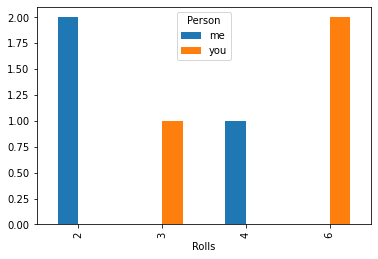

In [526]:
contingencyTableDiceRolls.plot(kind='bar')

In [527]:
chi2_contingency(contingencyTableDiceRolls)

(6.0,
 0.11161022509471268,
 3,
 array([[1. , 1. ],
        [0.5, 0.5],
        [0.5, 0.5],
        [1. , 1. ]]))

![](https://miro.medium.com/max/532/1*S8rfFkmLhDbOz4RGNwuz6g.png)

In [528]:
# Change the numberOfRolls and low & high of each player to see the impact on the chi-square test.
numberOfRolls = 5
person1Rolls= pd.Series( np.random.randint(low=1, high=6 + 1, size=numberOfRolls) )
person2Rolls= pd.Series( np.random.randint(low=5, high=6 + 1, size=numberOfRolls) )
diceRolls2 = pd.DataFrame({
    'Person':pd.concat([pd.Series(['Person1']*numberOfRolls),pd.Series(['Person2']*numberOfRolls)]),
    'Rolls':pd.concat([person1Rolls,person2Rolls])
})
diceRolls2.head()

,Person,Rolls
0,Person1,1
1,Person1,5
2,Person1,5
3,Person1,1
4,Person1,3


In [529]:
contingencyTableDiceRolls2 = diceRolls2.groupby(['Person','Rolls']).size().unstack('Person', fill_value=0)
contingencyTableDiceRolls2

Person,Person1,Person2
Rolls,,
1,2,0
3,1,0
5,2,3
6,0,2


<AxesSubplot:xlabel='Rolls'>

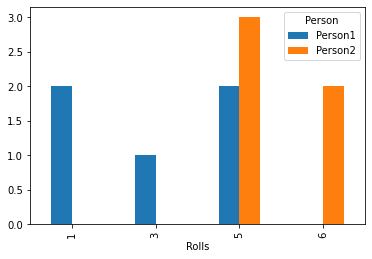

In [530]:
contingencyTableDiceRolls2.plot(kind='bar')

In [531]:
chi2_contingency(contingencyTableDiceRolls2)

(5.2,
 0.15772445039666255,
 3,
 array([[1. , 1. ],
        [0.5, 0.5],
        [2.5, 2.5],
        [1. , 1. ]]))

### Portfolio assignment 13
10 min: Do a bivariate analysis on the penguins dataset for the following combination of columns:
- species VS sex
- island VS sex

For this bivariate analysis, at least perform the following tasks:
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

![](https://i.imgur.com/0v1CGNV.png)

It's what I expected to be, the chances of being born male or female is 50%, now it's proven that the dataset is almost devided in 50% male and 50% female.

In [532]:
contingencyTable = penguins.groupby(['species','sex']).size().unstack('species', fill_value=0)
contingencyTable

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,73,34,58
Male,73,34,61


<AxesSubplot:xlabel='sex'>

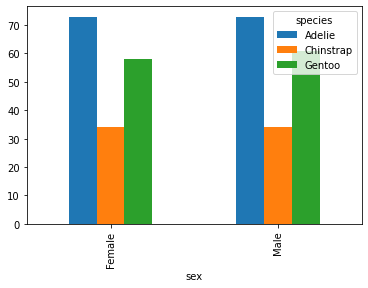

In [533]:
contingencyTable.plot(kind='bar')

In [534]:
chi2_contingency(contingencyTable)

(0.04860717014078319,
 0.9759893689765846,
 2,
 array([[72.34234234, 33.69369369, 58.96396396],
        [73.65765766, 34.30630631, 60.03603604]]))

It's a extreme low correlation, it's safe to say that there is no link between those two colums

In [559]:
contingencyTable = penguins.groupby(['island','sex']).size().unstack('island', fill_value=0)
contingencyTable

island,Biscoe,Dream,Torgersen
sex,,,
Female,80,61,24
Male,83,62,23


<AxesSubplot:xlabel='sex'>

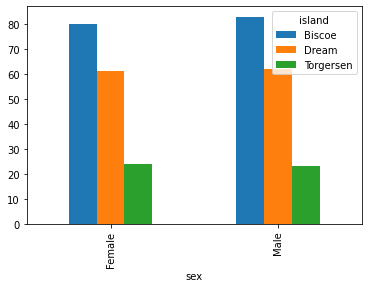

In [536]:
contingencyTable.plot(kind='bar')

It's what I expected to be, a male needs a female and the other way around too, so it makes sense that the population of the islands is devided in almost 50% male and 50% female

In [537]:
chi2_contingency(contingencyTable)

(0.05759904881286206,
 0.971611229281065,
 2,
 array([[80.76576577, 60.94594595, 23.28828829],
        [82.23423423, 62.05405405, 23.71171171]]))

It's a extreme low correlation, it's safe to say that there is no relation between those two colums

### Portfolio assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

![](https://i.imgur.com/0v1CGNV.png)

In [538]:
contingencyTable = pokemons.groupby(['Type 1','Type 2']).size().unstack('Type 1', fill_value=0)
contingencyTable

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 2,,,,,,,,,,,,,,,,,,
Bug,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0
Dark,0,0,0,0,0,1,0,0,1,3,3,0,0,3,1,2,0,6
Dragon,0,3,0,1,0,0,1,2,2,1,2,0,0,1,0,2,1,2
Electric,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
Fairy,0,0,1,1,0,0,0,0,0,2,0,0,5,0,6,3,3,2
Fighting,2,2,0,0,0,0,7,0,0,3,0,0,2,2,3,1,1,3
Fire,2,3,1,1,0,0,0,0,3,0,1,0,0,0,1,0,0,0
Flying,14,5,6,5,2,1,6,0,2,5,4,2,24,3,6,4,1,7
Ghost,1,2,0,1,0,0,0,0,0,0,2,1,0,0,1,0,4,2


<AxesSubplot:xlabel='Type 2'>

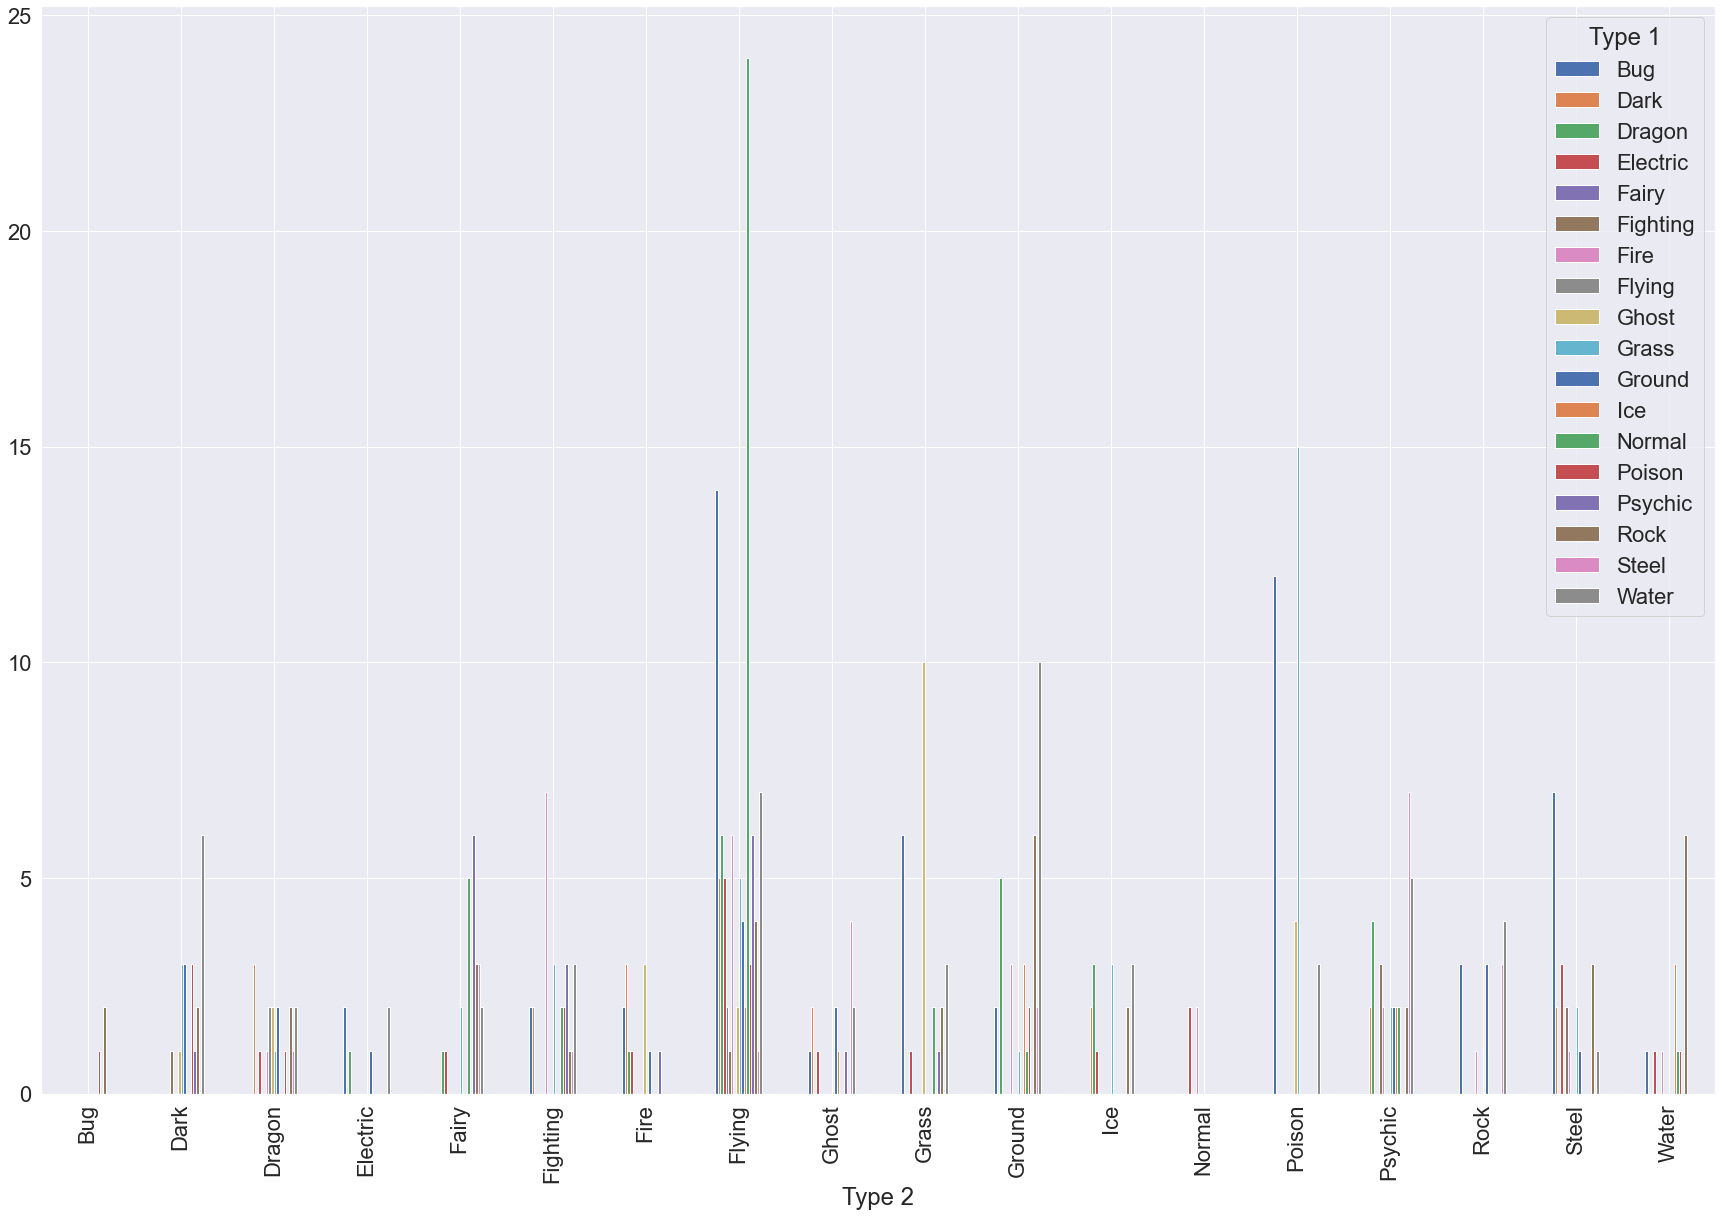

In [557]:
sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale = 2)
contingencyTable.plot(kind='bar')


There are a few types that might have a bigger correlation between each other, by the count of pokemons who exist in that group, an example is: Flying & Normal, Flying & Dragon. Normal types tend to have a bigger correlation between every other type, but other than that, there is no correlation between them.

In [558]:
chi2_contingency(contingencyTable)

(691.3117031288136,
 5.567690217754264e-35,
 289,
 array([[ 0.37681159,  0.15217391,  0.15217391,  0.12318841,  0.01449275,
          0.05072464,  0.17391304,  0.01449275,  0.15942029,  0.26811594,
          0.13768116,  0.07971014,  0.26811594,  0.0942029 ,  0.13768116,
          0.25362319,  0.15942029,  0.38405797],
        [ 2.51207729,  1.01449275,  1.01449275,  0.82125604,  0.09661836,
          0.33816425,  1.15942029,  0.09661836,  1.06280193,  1.78743961,
          0.9178744 ,  0.53140097,  1.78743961,  0.62801932,  0.9178744 ,
          1.69082126,  1.06280193,  2.56038647],
        [ 2.26086957,  0.91304348,  0.91304348,  0.73913043,  0.08695652,
          0.30434783,  1.04347826,  0.08695652,  0.95652174,  1.60869565,
          0.82608696,  0.47826087,  1.60869565,  0.56521739,  0.82608696,
          1.52173913,  0.95652174,  2.30434783],
        [ 0.75362319,  0.30434783,  0.30434783,  0.24637681,  0.02898551,
          0.10144928,  0.34782609,  0.02898551,  0.31884058,  0

There is no correlation between the types of pokemon